In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from scipy import stats
from scipy.stats import ranksums


font_dirs = ['/storage/home/hcoda1/8/zmobille3/scratch/arial']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
# font_manager.get_font_names()

plt.rcParams['font.family']='Arial'
plt.rcParams['font.size']=22
plt.rcParams['axes.titlesize']=22
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

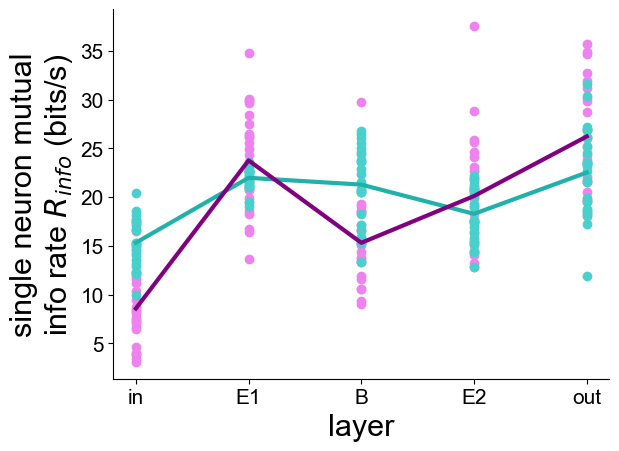

In [2]:
layers = ['in','E1','B','E2','out']; numLayers = len(layers)
layerAxis = [0,1,2,3,4]
avgtmi_v_layer = np.zeros(numLayers)
avgcmi_v_layer = np.zeros(numLayers)
T = 0.05 # 50 ms
for li in range(numLayers):
    layer = layers[li]
    path = f'model_mutual_info/countMI_{layer}.npy'
    cmis = np.load(path)/T
    numseeds = cmis.shape[0]
    path = f'model_mutual_info/timingMI_{layer}.npy'
    tmis = np.load(path)/T
    
    avgcmi = cmis.mean(axis=1)
    avgtmi = tmis.mean(axis=1)
    avgtmi_v_layer[li] = np.mean(tmis)
    avgcmi_v_layer[li] = np.mean(cmis)
    plt.plot(li*np.ones(numseeds),avgtmi,color='violet',marker='o',linestyle='')
    plt.plot(li*np.ones(numseeds),avgcmi,color='mediumturquoise',marker='o',linestyle='')
    
plt.plot(layerAxis,avgcmi_v_layer,color='lightseagreen',linewidth=3)
plt.plot(layerAxis,avgtmi_v_layer,color='purple',linewidth=3)
plt.xlabel('layer')
plt.ylabel('single neuron mutual\ninfo rate $R_{info}$ (bits/s)')
plt.xticks(layerAxis,layers)
sns.despine()
plt.savefig('singleNrnMI_v_layer.png',bbox_inches='tight',dpi=200)
plt.savefig('singleNrnMI_v_layer.svg',bbox_inches='tight',dpi=200)
plt.show()

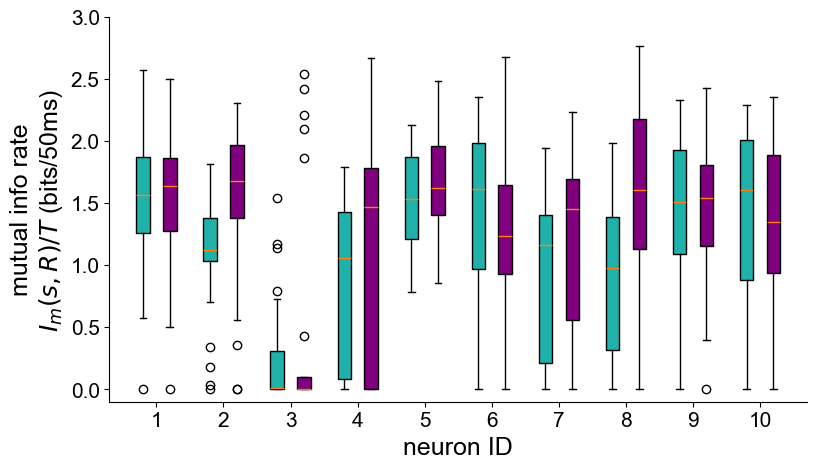

In [3]:
# muscleNames = ["LAX","LBA","LSA","LDVM","LDLM",
#     "RAX","RBA","RSA","RDVM","RDLM"]
#f'model_mutual_info/countMI_{layer}.npy'
all_cmis = np.load('model_mutual_info/countMI_out.npy')
all_tmis = np.load('model_mutual_info/timingMI_out.npy')

nummuscles = all_cmis.shape[1]

ccolors = ['lightseagreen' for x in range(nummuscles)]
tcolors = ['purple' for x in range(nummuscles)]

fig, ax = plt.subplots(figsize=(9,5))
cplot = ax.boxplot(all_cmis,
                  patch_artist=True,
                  positions=np.arange(0.8,nummuscles,1),
                  widths=0.2*np.ones(nummuscles))

for patch, color in zip(cplot['boxes'], ccolors):
    patch.set_facecolor(color)
    
    
tplot = ax.boxplot(all_tmis,
                  patch_artist=True,
                  positions=np.arange(1.2,nummuscles+1,1),
                  widths=0.2*np.ones(nummuscles))

for patch, color in zip(tplot['boxes'], tcolors):
    patch.set_facecolor(color)

plt.ylim(-0.1,3)
plt.yticks([0,0.5,1,1.5,2,2.5,3.])
plt.ylabel('mutual info rate\n$I_m(s,R)/T$ (bits/50ms)',fontsize=18)
# plt.ylabel('MI (bits)')
neuron_axis = ['%s'%x for x in np.arange(1,11,1)]
plt.xticks(np.arange(1,nummuscles+1,1),neuron_axis)
plt.xlabel('neuron ID',fontsize=18)
sns.despine()
plt.savefig('allNeurons_model.png',bbox_inches='tight',dpi=200)
plt.savefig('allNeurons_model.svg',bbox_inches='tight',dpi=200)
plt.show()

In [5]:
all_tmis.shape

(25, 10)

In [6]:
all_cmis.shape

(25, 10)

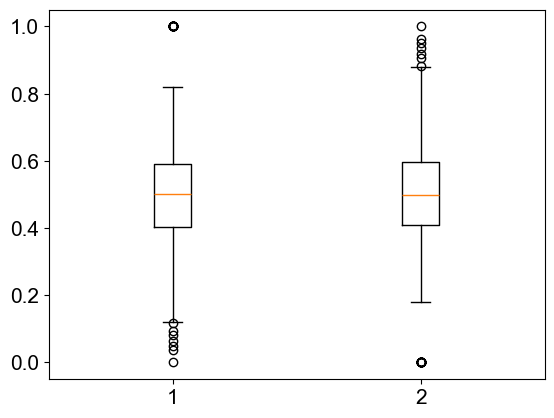

In [4]:
numseeds = all_tmis.shape[0]
numnrns = all_tmis.shape[1]
cmiprops=[]
tmiprops=[]
for seed in range(numseeds):
    for nrn in range(numnrns):
        cmi = all_cmis[seed,nrn]
        tmi = all_tmis[seed,nrn]
        total = cmi + tmi
        if total != 0:
            cmiprop = cmi/total
            tmiprop = tmi/total
            cmiprops.append(cmiprop)
            tmiprops.append(tmiprop)
        else:
            continue
props = np.vstack((cmiprops,tmiprops)).T
# plt.boxplot(cmiprops)
plt.boxplot(props)
plt.show()

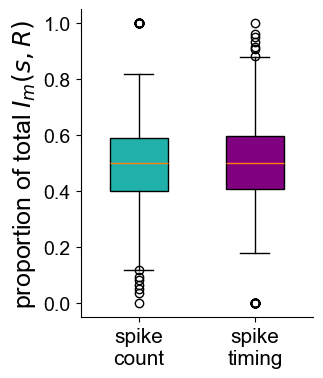

In [5]:
fig,ax = plt.subplots(figsize=(3,4))
countplot = plt.boxplot(cmiprops,positions=[1],patch_artist=True,widths=[0.2])
ccolors=['lightseagreen']
for patch, color in zip(countplot['boxes'], ccolors):
    patch.set_facecolor(color)
timeplot = plt.boxplot(tmiprops,positions=[1.4],patch_artist=True,widths=[0.2])
tcolors=['purple']
for patch, color in zip(timeplot['boxes'], tcolors):
    patch.set_facecolor(color)

plt.xlim(0.8,1.6)
plt.yticks(fontsize=14)
plt.xticks([1,1.4],['spike\ncount','spike\ntiming'],fontsize=15)
plt.ylabel('proportion of total $I_m(s,R)$',fontsize=18)
sns.despine()
plt.savefig('5layerModel_propMI.png',bbox_inches='tight',dpi=200)
plt.savefig('5layerModel_propMI.svg',bbox_inches='tight',dpi=200)
plt.show()

In [8]:
np.median(cmiprops)

0.500783319067923

In [9]:
np.median(tmiprops)

0.49921668093207705

1.3110811678994934
1.1260477796862416


RanksumsResult(statistic=2.5895220653522357, pvalue=0.0048054631600338345)

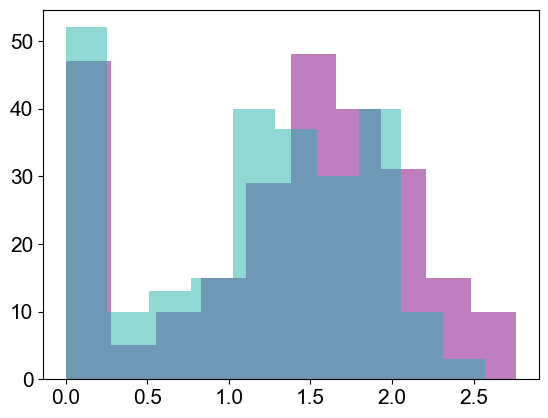

In [16]:
flat_tmis = all_tmis.flatten()
flat_cmis = all_cmis.flatten()
print(np.mean(flat_tmis))
print(np.mean(flat_cmis))
plt.hist(flat_tmis,color='purple',alpha=0.5)
plt.hist(flat_cmis,color='lightseagreen',alpha=0.5)
ranksums(flat_tmis,flat_cmis,'greater')